<a href="https://colab.research.google.com/github/khanmustuffa11/Modern-Day-Computer-vision/blob/main/chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
from copy import deepcopy

# Feed Forward Propagation


In [40]:
def feed_forward(inputs,outputs,weights):
  pre_hidden = np.dot(inputs,weights[0])+weights[1]
  hidden = 1/(1+np.exp(-pre_hidden))
  pred_out = np.dot(hidden,weights[2])+weights[3]
  mean_squared_error = np.mean(np.square(pred_out - outputs))
  return mean_squared_error

# Updating weights and calculating loss

In [41]:
def update_weights(inputs, outputs,weights,lr):
  original_weights = deepcopy(weights)
  temp_weights = deepcopy(weights)
  updated_weights = deepcopy(weights)
  original_loss = feed_forward(inputs,outputs,original_weights)
  for i,layer in enumerate(original_weights):
    for index, weight in np.ndenumerate(layer):
      temp_weights = deepcopy(weights)
      temp_weights[i][index] += 0.0001
      _loss_plus = feed_forward(inputs, outputs,temp_weights)
      grad = (_loss_plus - original_loss)/(0.0001)
      updated_weights[i][index] -= grad*lr
      return updated_weights, original_loss



# feed forward and backpropagation together (Simple Neural Network)

In [26]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [42]:
x = np.array([[1,1]])
y = np.array([[0]])

In [32]:
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

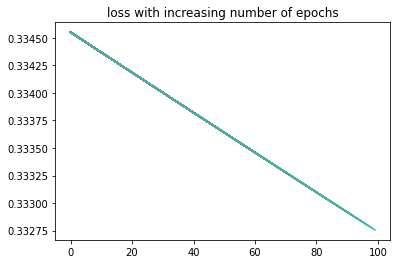

In [33]:
losses = []
for epoch in range(100):
  W, loss = update_weights(x,y,W,0.01)
  losses.append(loss)
  plt.plot(losses)
  plt.title('loss with increasing number of epochs')

In [22]:
W

[array([[ 0.03726425, -0.582     , -0.2723    ],
        [ 0.3793    , -0.5204    ,  0.1896    ]], dtype=float32),
 array([-0.014 ,  0.5607, -0.0628], dtype=float32),
 array([[ 0.1528],
        [-0.1745],
        [-0.1135]], dtype=float32),
 array([-0.5516], dtype=float32)]

In [25]:
pre_hidden = np.dot(x,W[0])+W[1]
hidden = 1/(1+np.exp(-pre_hidden))
out = np.dot(hidden,W[2])+W[3]
out

array([[-0.57683484]])